In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tabulate import tabulate
import tensorflow_data_validation as tfdv
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')
from PIL import Image
import urllib.request


In [6]:
housing = pd.read_csv("housing.csv")

In [ ]:
housing.head(20)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


# Dataset Description
The dataset contains housing-related information for various locations.

- **longitude**: Longitude coordinate of the location.
- **latitude**: Latitude coordinate of the location.
- **housing_median_age**: Median age of the housing in the location.
- **total_rooms**: Total number of rooms in the housing.
- **total_bedrooms**: Total number of bedrooms in the housing.
- **population**: Total population in the housing area.
- **households**: Total number of households in the housing.
- **median_income**: Median income of households in the housing area.
- **median_house_value**: Median value of houses in the housing area.
- **ocean_proximity**: Proximity of the housing area to the ocean.


In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Overall Summary Statistics

The dataset provides housing-related information for various locations. Here's a brief overview of the key statistics:

- **Count**: There are 20,640 entries in the database. All fields except "total_bedrooms" (which has 20,433 entries) have this number. The median income is $3.87 and the median home value is $206,855.82.
- **Min**: Minimum value from 1.0 to 14,999.0.
- **Median**: Median ranges from $29.0 to $3,534.80.
- **MAXIMUM**: The maximum amount is between $3 and $500,001.0.

In [ ]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
housing.dropna(inplace=True)

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


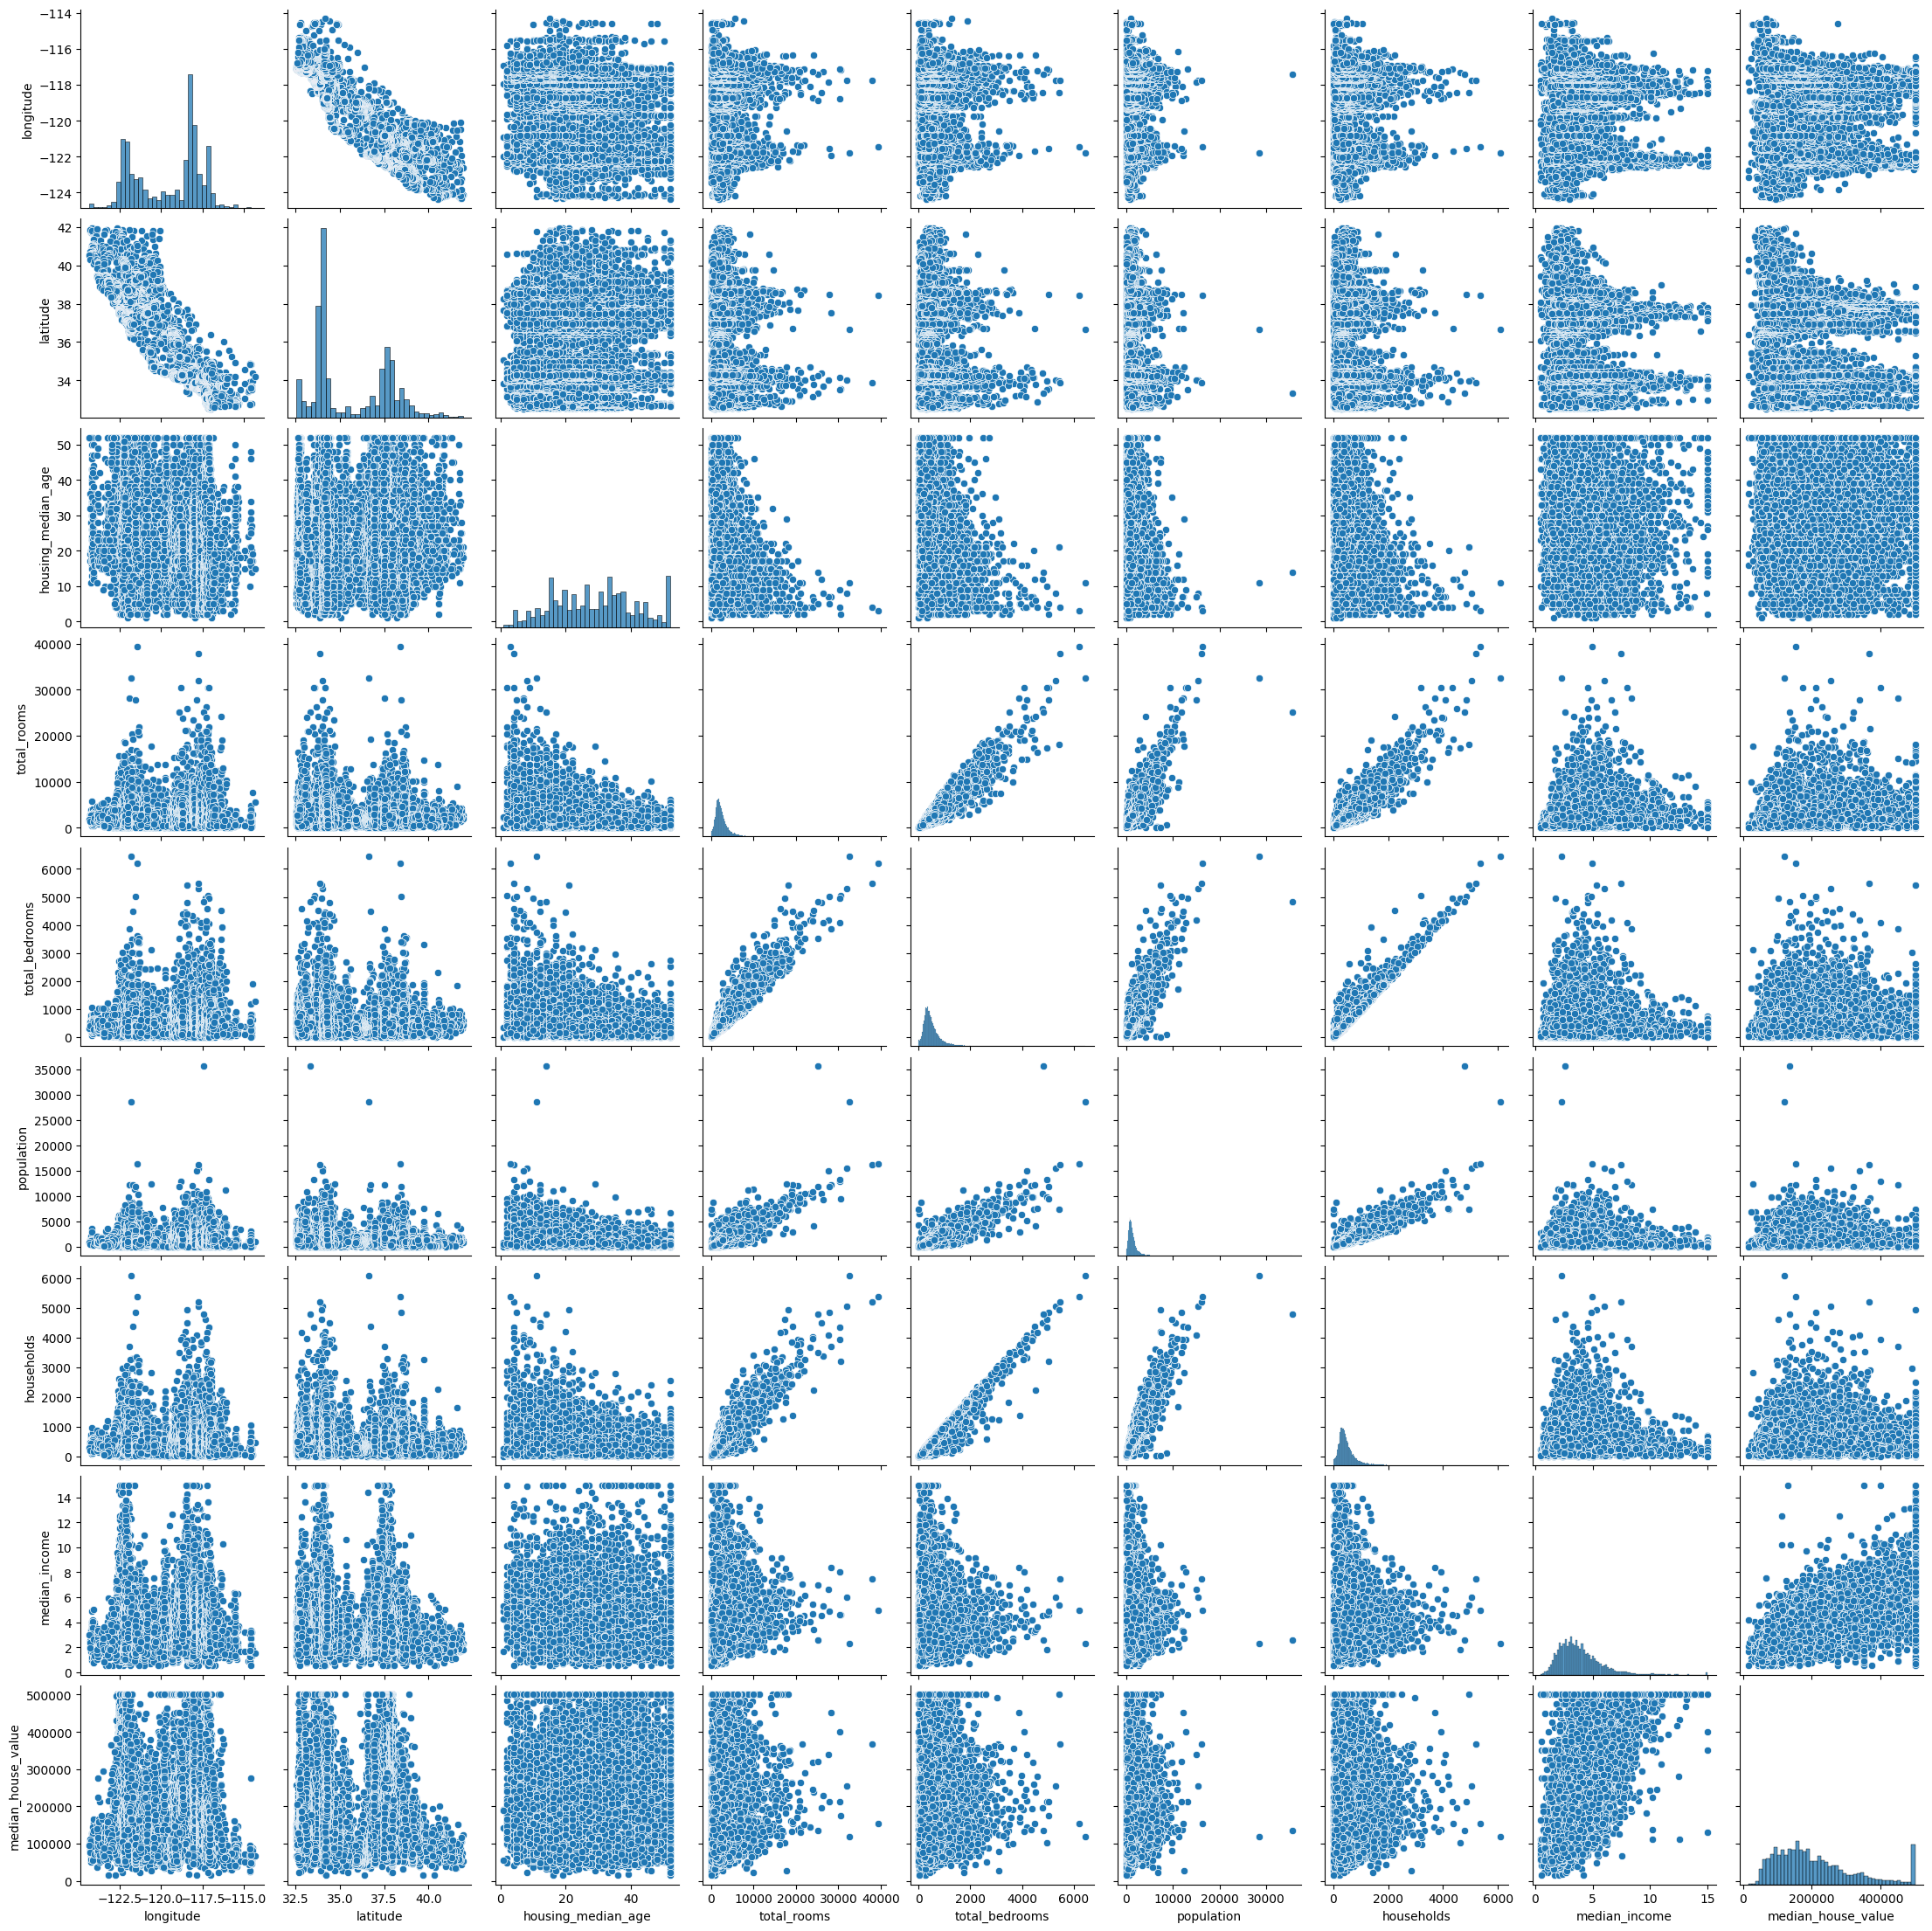

In [ ]:
sns.pairplot(housing)
plt.show()

## Pair Plot Analysis

- To better understand the relationships between different factors that affect housing prices, we created a pair plot.
- Each subplot here shows how two features are related to each other. For instance, we understand there might be a positive correlation between 'median_income' and 'median_house_value'.
-This means that in areas with higher median income, there might also be higher median house values.


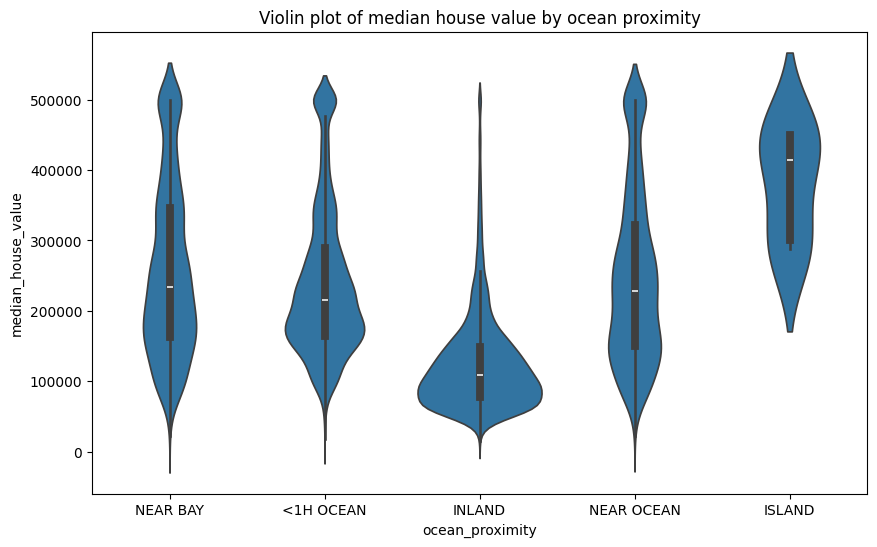

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='ocean_proximity', y='median_house_value', data=housing)
plt.title('Violin plot of median house value by ocean proximity')
plt.show()

## Violin Plot Analysis
- We can see here the distribution of median house value across different categories of ocean proximity.
- The violin plots show that the distribution of house prices is wider for locations closer to the ocean, whereas inland areas tend to have a tighter spread in prices.
- Interestingly, the center lines within the violins also reveal that median house values tend to be higher for houses closer to the ocean.


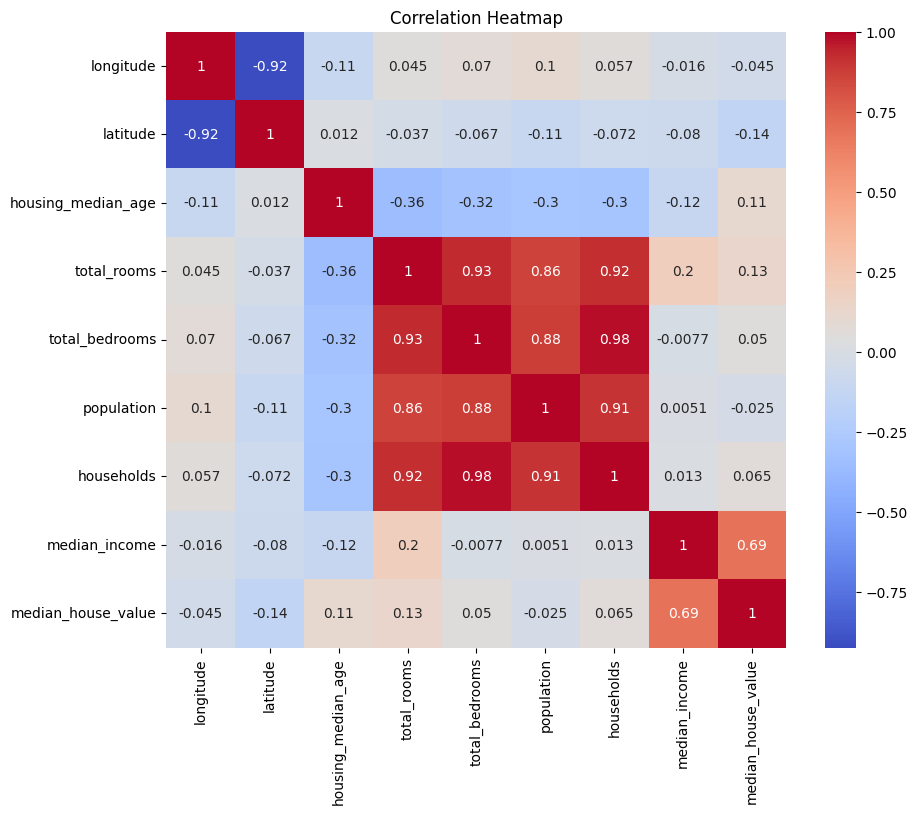

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(housing.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#HeatMap Analysis

- This heatmap is a useful tool to visualize the relationships between the numerical features in our California housing dataset. Each square shows the correlation coefficient between two features, colored according to a 'coolwarm' colormap
- Colors indicate how closely features are related. Red means they tend to go up together, blue means they tend to go in opposite directions, and white means there's no clear connection.
- For example, one red square shows a strong link between 'median income' and 'median house value'. This makes sense because houses in wealthier areas are likely to be more expensive.

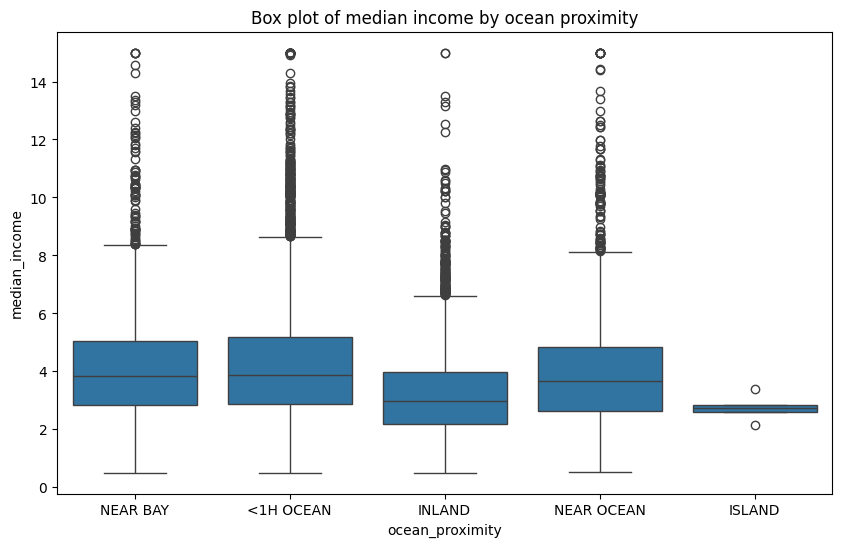

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='ocean_proximity', y='median_income', data=housing)
plt.title('Box plot of median income by ocean proximity')
plt.show()

## Box Plot Analysis
- This box plot shows us how median income varies across different locations relative to the ocean.
- The boxes reveal a wider spread of incomes for houses closer to the ocean, whereas inland areas tend to have a tighter range of incomes.
- Interestingly, the center lines within the boxes also suggest that median income tends to be higher for locations closer to the ocean.

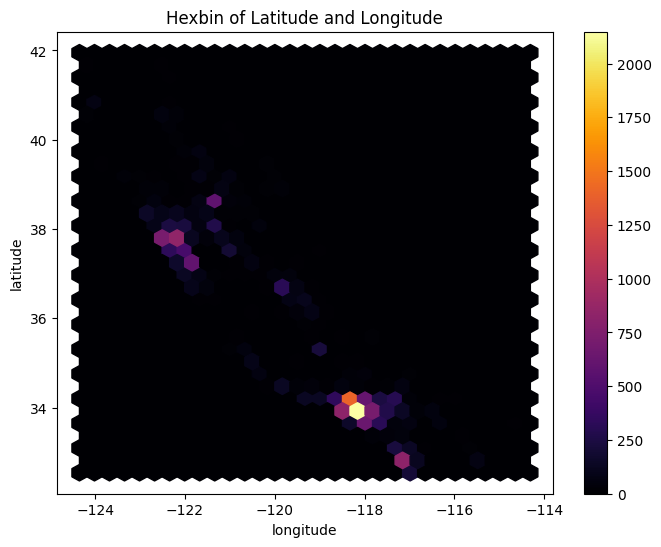

In [ ]:
housing.plot(kind='hexbin', x='longitude', y='latitude', gridsize=30, figsize=(8, 6), cmap='inferno')
plt.title('Hexbin of Latitude and Longitude')
plt.show()

## Hexbin Plot Analysis

- This visualization shows the geographic distribution of houses in our California housing dataset.
- The color intensity indicates the concentration of houses in different areas. Darker colored regions represent areas with a higher density of houses, while lighter colored areas represent areas with fewer houses.
- We can see that houses are not spread uniformly across California, but rather there are clusters of houses in certain areas.

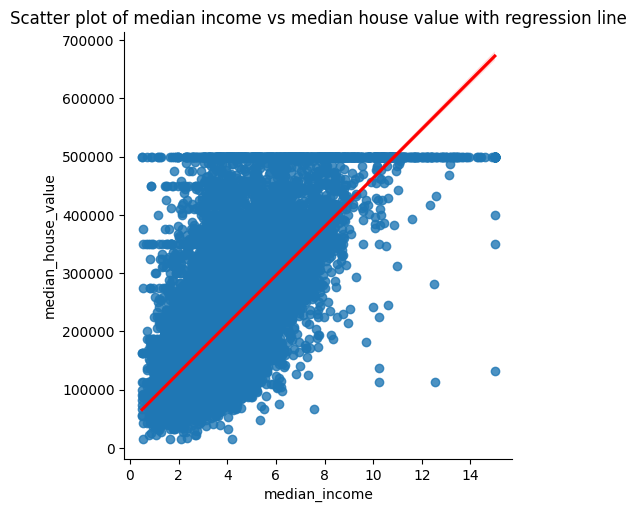

In [ ]:
sns.lmplot(x='median_income', y='median_house_value', data=housing, line_kws={'color': 'red'})
plt.title('Scatter plot of median income vs median house value with regression line')
plt.show()

## Scatter Plot Analysis

- This scatter plot shows the relationship between median income and median house value in California.
- The red line represents the fitted regression line, which suggests a general upward trend. This means that as median income increases, median house value also tends to increase.
- However, it's important to note that there is some scatter around the line, indicating that there are other factors besides median income that can influence house prices.

In [ ]:
housing = housing[housing['median_house_value'] < 500000]

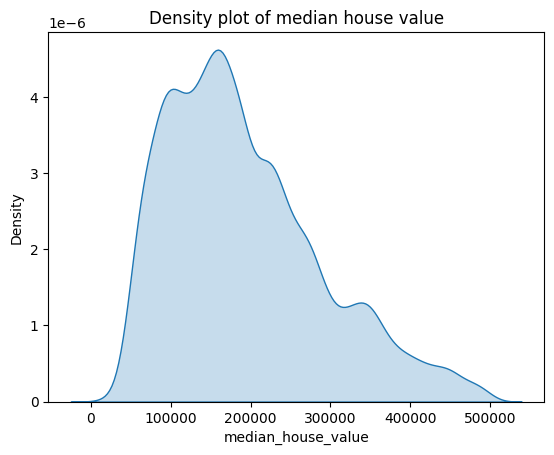

In [ ]:
sns.kdeplot(housing['median_house_value'], shade=True)
plt.title('Density plot of median house value')
plt.show()

## Analysis of Density Plot

- After filtering our data to focus on houses priced below $500,000, we can see the distribution of median house values in this price range using this density plot.
- The shape of the curve suggests that a larger portion of houses fall into the lower and middle price ranges, with the density tapering off towards more expensive houses.
- This aligns with our filtering criteria and reflects the distribution of median house values within this specific price range.

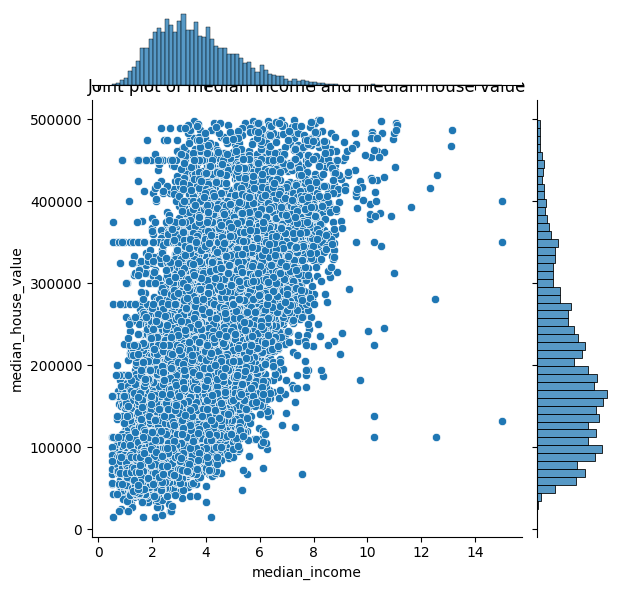

In [ ]:
sns.jointplot(x='median_income', y='median_house_value', data=housing, kind='scatter')
plt.title('Joint plot of median income and median house value')
plt.show()

## Analysis of Joint Plot

- This joint plot shows the relationship between median income and median house value in California.
- We can see that there's a general upward trend, where houses in areas with higher median income tend to also have higher median house values.
- However, it's important to note that there's also significant scatter in the data points.
- This indicates that other factors besides median income can influence house prices.

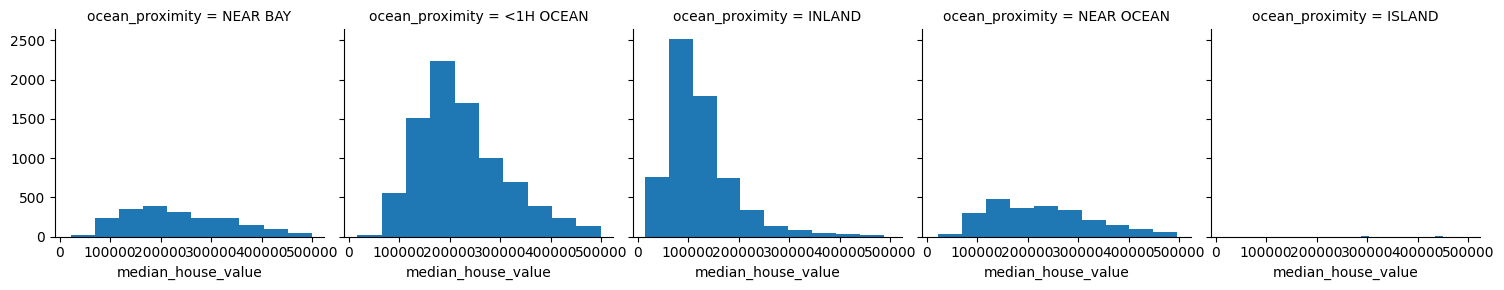

In [ ]:
g = sns.FacetGrid(housing, col='ocean_proximity')
g.map(plt.hist, 'median_house_value')
plt.show()

## Analysis of Facet Grid

- This facet grid helps us see how the distribution of median house value varies across different locations relative to the ocean.
- Each column represents an ocean proximity category.
- Here, we can see that the distribution of median house value in the 'NEAR BAY' category  appears to be different from the distribution in the 'OCEAN' category.
- This suggests that there might be a relationship between ocean proximity and the spread of house prices in California.

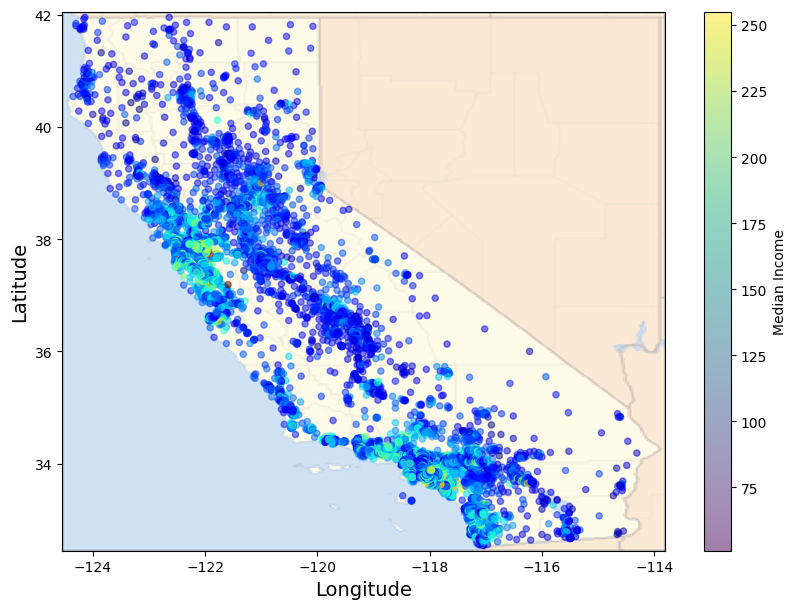

In [ ]:


with urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/thumb/1/1b/California_Locator_Map.PNG/280px-California_Locator_Map.PNG') as url:
    california_img = np.array(Image.open(url))


ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       c="median_income", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.5)

plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)


cbar = plt.colorbar()
cbar.set_label('Median Income')

plt.show()

## Analysis of Scatter Plot overlaid on a map of California

- We can see here the geographic distribution of houses in our California housing dataset, overlaid on a map.
- The color of each house represents its median income.  
- This allows us to see clusters of houses with similar income levels throughout the state.
- For instance, we can see areas with a higher concentration of houses in colors representing higher median income in the San Francisco Bay Area, which is a hub for technology companies and has a high cost of living..

In [ ]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()


housing['ocean_proximity'] = le.fit_transform(housing['ocean_proximity'])

X_train, X_test, y_train, y_test = train_test_split(housing.drop('median_house_value', axis=1), housing['median_house_value'], test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)


rf.fit(X_train, y_train)


y_pred_rf = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse_rf}')


Root Mean Squared Error: 44828.22602725059


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the model
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=42)

# Fit the model
gb.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse_gb}')

Root Mean Squared Error: 63697.644210284474


In [ ]:
from sklearn.svm import SVR


svr = SVR(kernel='linear', C=1.0, epsilon=0.2)


svr.fit(X_train, y_train)


y_pred_svr = svr.predict(X_test)


mse = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse_svr}')

Root Mean Squared Error: 83400.4028318409


In [ ]:
from sklearn.linear_model import Ridge


ridge = Ridge(alpha=1.0)

ridge.fit(X_train, y_train)


y_pred_ridge = ridge.predict(X_test)


mse = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse_ridge}')

Root Mean Squared Error: 61395.70467109303


In [ ]:
rmse_values = {
    'Random Forest': rmse_rf,
    'Gradient Boosting': rmse_gb,
    'Support Vector Regression': rmse_svr,
    'Ridge Regression': rmse_ridge
}

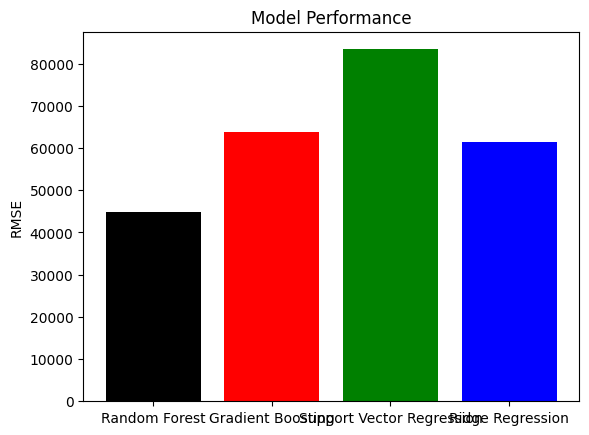

In [ ]:
import matplotlib.pyplot as plt

# Create a bar plot
plt.bar(rmse_values.keys(), rmse_values.values(), color=['black', 'red', 'green', 'blue', 'cyan'])
plt.ylabel('RMSE')
plt.title('Model Performance')

# Show the plot
plt.show()

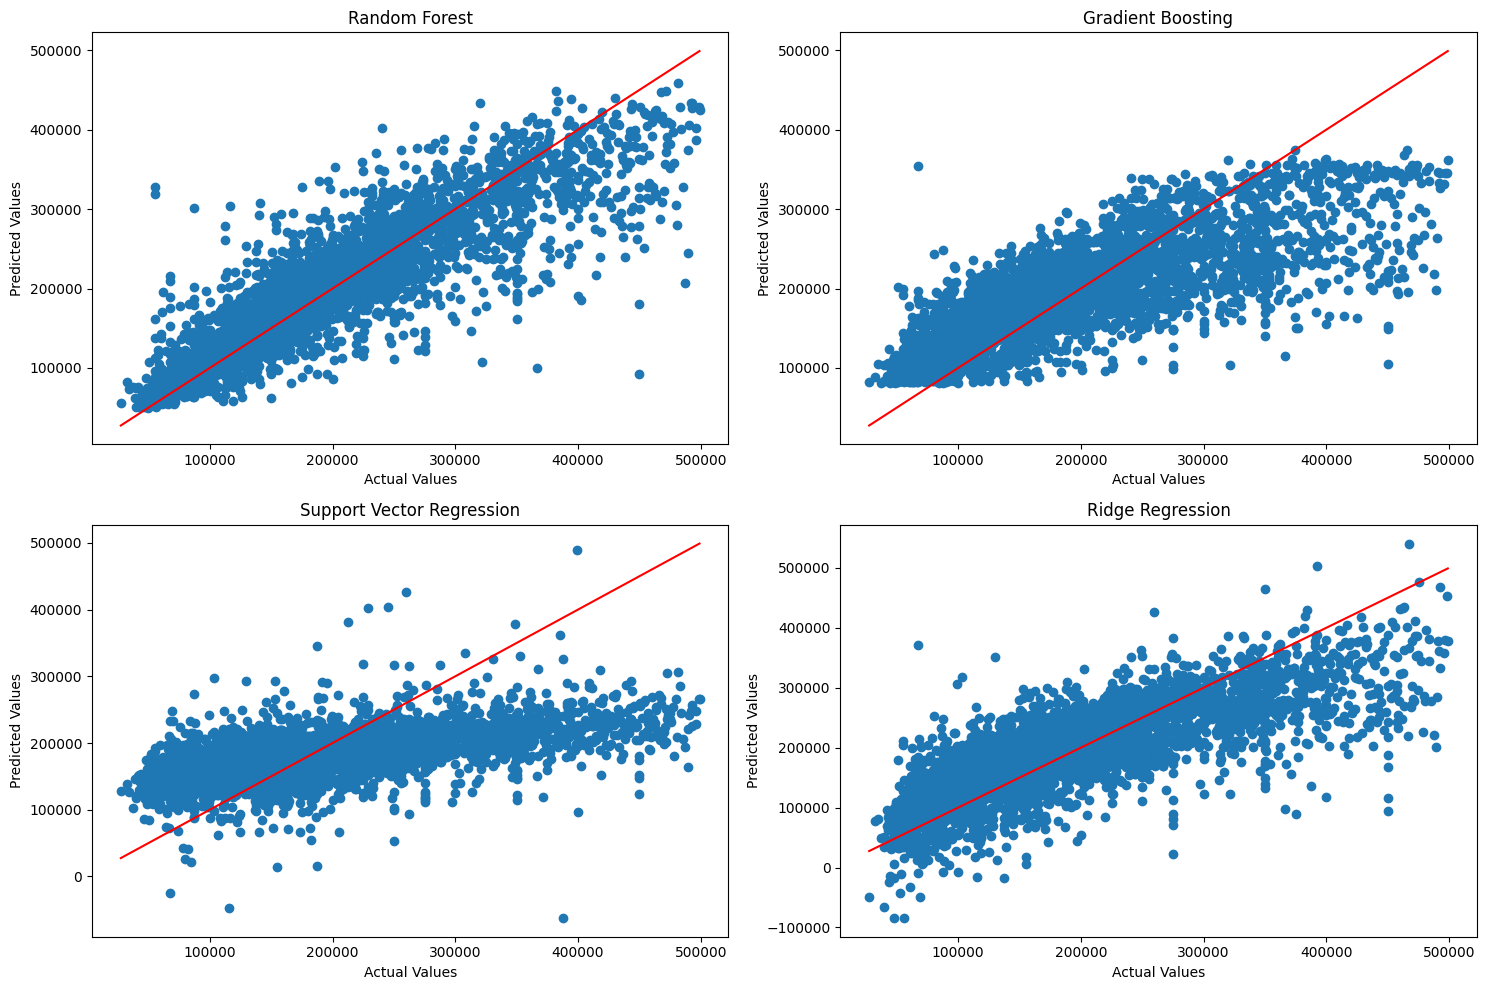

In [ ]:
# Create a figure and axes
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Plot actual vs predicted values for each model
ax[0, 0].scatter(y_test, y_pred_rf)
ax[0, 0].set_xlabel('Actual Values')
ax[0, 0].set_ylabel('Predicted Values')
ax[0, 0].set_title('Random Forest')

ax[0, 1].scatter(y_test, y_pred_gb)
ax[0, 1].set_xlabel('Actual Values')
ax[0, 1].set_ylabel('Predicted Values')
ax[0, 1].set_title('Gradient Boosting')

ax[1, 0].scatter(y_test, y_pred_svr)
ax[1, 0].set_xlabel('Actual Values')
ax[1, 0].set_ylabel('Predicted Values')
ax[1, 0].set_title('Support Vector Regression')

ax[1, 1].scatter(y_test, y_pred_ridge)
ax[1, 1].set_xlabel('Actual Values')
ax[1, 1].set_ylabel('Predicted Values')
ax[1, 1].set_title('Ridge Regression')

# Plot a diagonal line
line = np.linspace(min(y_test), max(y_test), 1000)
for subplot in ax.flat:
    subplot.plot(line, line, color='red')

plt.tight_layout()
plt.show()